In [395]:
# 데이터 불러오기
# 데이터 확인 - Nan, 0, 타입, 피쳐데이터 간격(너무 크면 표준화작업)
# - 문자타입 : 삭제, 아스키코드, 원핫인코딩
# 서로 데이터칸 상관관계 corr
# 팀명 - 원핫인코딩

# 데이터 전처리1 - data, result 분리
# 데이터 전처리2 - train, test set 분리

# 데이터 실습시키기

# 데이터 예측
# 데이터 예측률 구하기

# 2018년 연봉 예측 프로그램 구현


In [396]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항 feature를 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [397]:
df = pd.read_csv('../z20_data/picher_stats_2017.csv')
df.head(3)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000


In [398]:
# df.info()  # null 값 없음
df.describe()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,3.197368,3.157895,1.473684,2.644737,0.888158,28.848684,6.092105,56.953947,7.049605,4.183289,1.209934,0.340507,68.523026,6.046053,1.056908,5.506842,5.536776,0.665921,18932.236842,16505.263158
std,3.863635,3.130929,4.808860,4.515474,1.633869,19.371502,9.750093,50.297632,2.827552,2.362819,1.017072,0.088985,11.591590,4.166645,1.843708,1.871047,1.981596,1.322205,30940.732924,25046.478092
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.700000,0.000000,-1.210000,0.730000,-0.690000,-1.010000,2700.000000,2700.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,19.900000,5.492500,2.585000,0.690000,0.303750,62.400000,4.082500,-0.092500,4.437500,4.347500,-0.060000,4000.000000,3000.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,26.000000,0.000000,43.700000,6.900000,3.750000,1.070000,0.333000,68.250000,5.355000,0.330000,5.210000,5.320000,0.130000,7550.000000,6000.000000
75%,5.000000,6.000000,0.000000,3.000000,1.000000,41.000000,7.000000,80.325000,8.212500,5.262500,1.550000,0.364000,74.525000,7.055000,1.522500,6.392500,6.570000,0.930000,18500.000000,15250.000000
max,20.000000,12.000000,37.000000,24.000000,7.000000,75.000000,31.000000,193.100000,22.500000,18.000000,9.000000,0.833000,100.000000,36.000000,7.280000,18.730000,17.600000,6.620000,230000.000000,150000.000000


team명 원-핫인코딩

In [399]:
team = df['팀명']
team_numpy = team.values.reshape(-1,1)

In [400]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(team_numpy)

OneHotEncoder(sparse_output=False)

In [401]:
ohe.categories_

[array(['KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
       dtype=object)]

In [402]:
team_ohe = ohe.transform(team_numpy)

team_df = pd.DataFrame(team_ohe, columns=ohe.categories_)
team_df

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [403]:
for team in ohe.categories_:
    df[team] = team_df[team]

In [404]:
df.head(3)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,85000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,소사,LG,11,11,1,0,0,30,29,185.1,...,50000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,150000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [405]:
df.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성',
       '한화'],
      dtype='object')

In [406]:
col1 = df.columns[-9:].to_list()
col2 = df.columns[2:22].to_list()
col3 = df.columns[:2].to_list()
new_col = col1+col2+col3
df = df[new_col]
df


,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화,승,...,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),선수명,팀명
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16,...,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,켈리,SK
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11,...,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,소사,LG
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,...,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,양현종,KIA
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10,...,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,차우찬,LG
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13,...,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,레일리,롯데
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,...,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100,장민재,한화
148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,...,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100,정용운,KIA
149,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,...,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000,노경은,롯데
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,...,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900,김승현,삼성


In [407]:
# 데이터 전처리1 - data, result 분리
data = df.iloc[:,:-4].to_numpy()
result = df['연봉(2018)'].to_numpy()

In [408]:
# 데이터 전처리2 - train, test set 분리
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(
    data, result
)
train_input

array([[0.  , 0.  , 0.  , ..., 3.26, 2.69, 1.81],
       [0.  , 0.  , 0.  , ..., 5.39, 5.58, 0.  ],
       [0.  , 0.  , 0.  , ..., 3.6 , 3.52, 1.71],
       ...,
       [0.  , 0.  , 0.  , ..., 3.66, 3.25, 0.27],
       [1.  , 0.  , 0.  , ..., 5.28, 5.55, 0.07],
       [0.  , 0.  , 0.  , ..., 5.29, 5.05, 0.28]])

In [409]:
# 데이터 학습시키기
# LinearRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input,train_target)

LinearRegression()

In [410]:
lr.score(train_input,train_target)

0.7304993969521064

In [411]:
lr.score(test_input,test_target)

0.5795303303272725

In [412]:
# 예측률이 
# train : 0.704
# test : 0.589 로 매우 낮음

In [413]:
# 데이터 훈련 - 다항회귀로 차수 높이기
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=4, include_bias=False)

pf.fit(train_input)

train_poly = pf.transform(train_input)
test_poly = pf.transform(test_input)

In [414]:
lr.fit(train_poly,train_target)

LinearRegression()

In [415]:
lr.score(train_poly,train_target)

1.0

In [416]:
lr.score(test_poly,test_target)

-0.5969484159527889

In [417]:
# test_poly는 -7.11이 나왔으므로 
# 릿지 규제를 통해 정확도를 높이기 위해서 표준화를 진행한다

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [418]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(train_scaled,train_target)

Ridge()

In [419]:
ridge.score(train_scaled,train_target)

0.9999996665030141

In [420]:
ridge.score(test_scaled,test_target)

-8.646872989215098

In [421]:
# 아직도 test_scaled 의 정확도가 0.1771 
# alpha 값을 조정하여 정확도 높이기

alpha_list = [0.001,0.01,0.1,1,10,100]   # 6개
train_score= []
test_score = []

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))



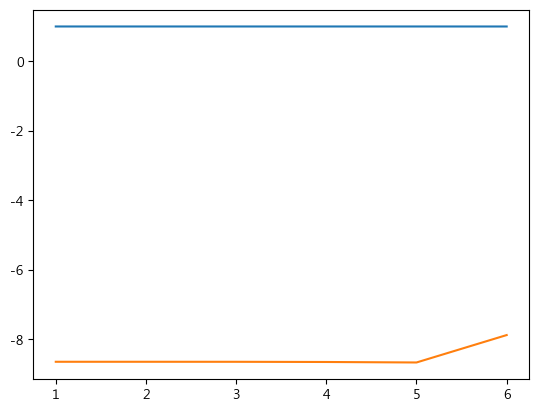

In [422]:
x = [[1],[2],[3],[4],[5],[6]]
plt.plot(x,train_score)
plt.plot(x,test_score)

In [423]:
# alpha값을 조정해도.. test_score의 값은 커지지 않음...
# degree를 높여볼까?.. LinearRegressor(degree = 4), Ridge(alpha=100) 일때 그나마...
# 0.505

ridge = Ridge(alpha=100)
ridge.fit(train_scaled,train_target)

Ridge(alpha=100)

In [424]:
ridge.score(train_scaled,train_target)

0.9994741866771796

In [425]:
ridge.score(test_scaled,test_target)

-7.872728692838059